## **Implemention of The Ensamble Method**

---
### Fruit Dataset

Using width and height to classify fruit apple and orange.

#### **Part 1. DecisionTreeClassifier**



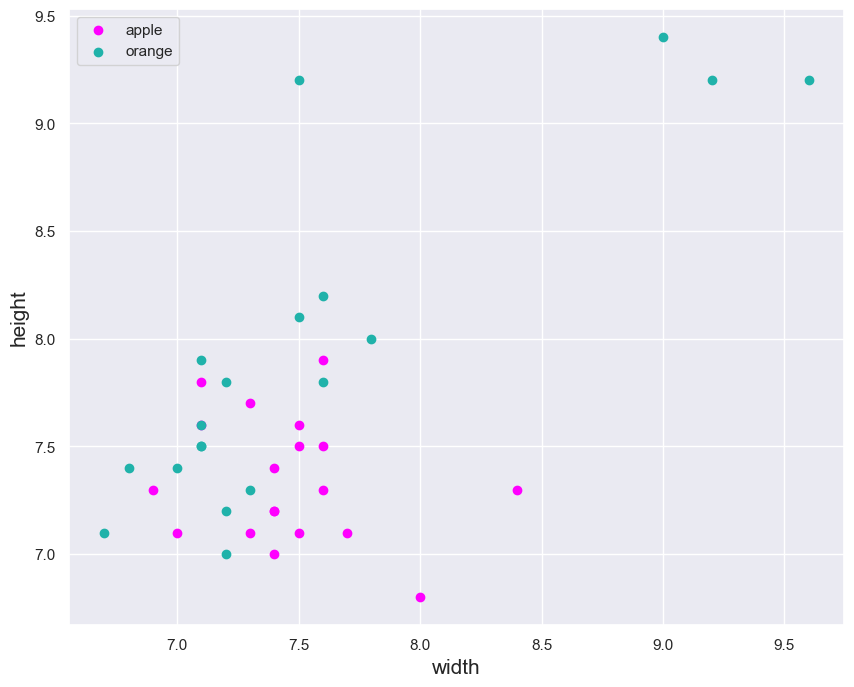

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

df = pd.read_table('Dataset/fruit_data_with_colors.txt')

idx = df.index[(df.fruit_name == "apple") | (df.fruit_name == "orange")]
df = df.iloc[idx]

X = df[["width", "height"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "apple":
        return 0
    else:
        return 1
         
# Create target value array
y = df["fruit_name"].map(make_labels).to_numpy()

# Plot the data
fruit = ["apple", "orange"]
colors = ["magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for fruit, color in zip(fruit, colors):
    temp_df = df[df.fruit_name == fruit]
    ax.scatter(temp_df.width,
               temp_df.height,
               c = color,
               label = fruit, 
               )
    
ax.set_xlabel("width", fontsize = 15)
ax.set_ylabel("height", fontsize = 15)
ax.legend(loc='upper left')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier


stump_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
stump_clf.fit(X_train, y_train)
stump_y_pred = stump_clf.predict(X_test)
print(f"Stump Classification Report")
print(classification_report(y_test, stump_y_pred), "\n")


tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Stump Classification Report
              precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.55      0.86      0.67         7

    accuracy                           0.62        16
   macro avg       0.67      0.65      0.62        16
weighted avg       0.69      0.62      0.61        16
 

Tree Classification Report
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         9
           1       0.57      0.57      0.57         7

    accuracy                           0.62        16
   macro avg       0.62      0.62      0.62        16
weighted avg       0.62      0.62      0.62        16
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.55      0.86      0.67         7

    accuracy                           0.62        16
   macro avg       0.67      0.65      

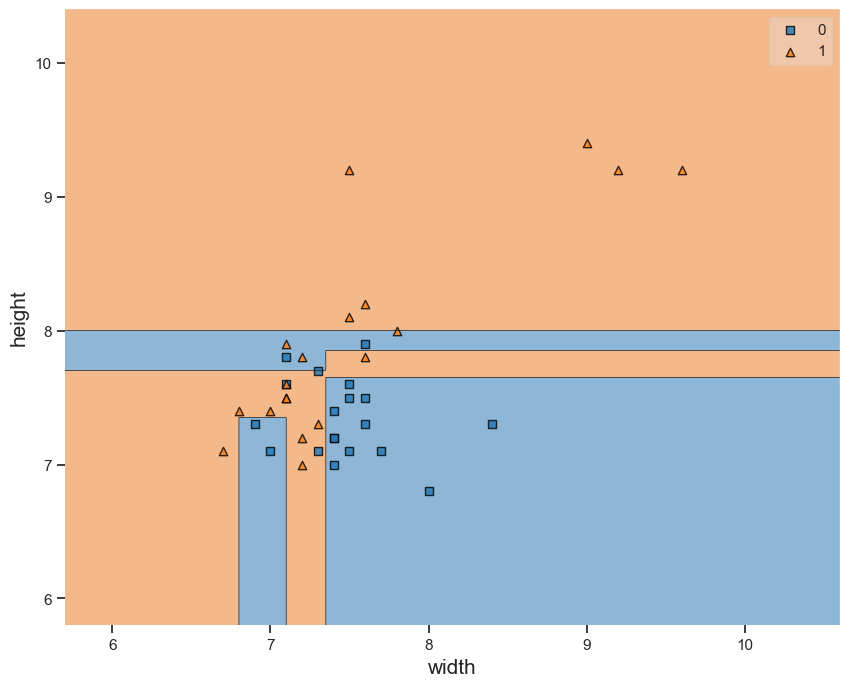

In [19]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("width", fontsize = 15)
plt.ylabel("height", fontsize = 15)
plt.grid()
plt.show()

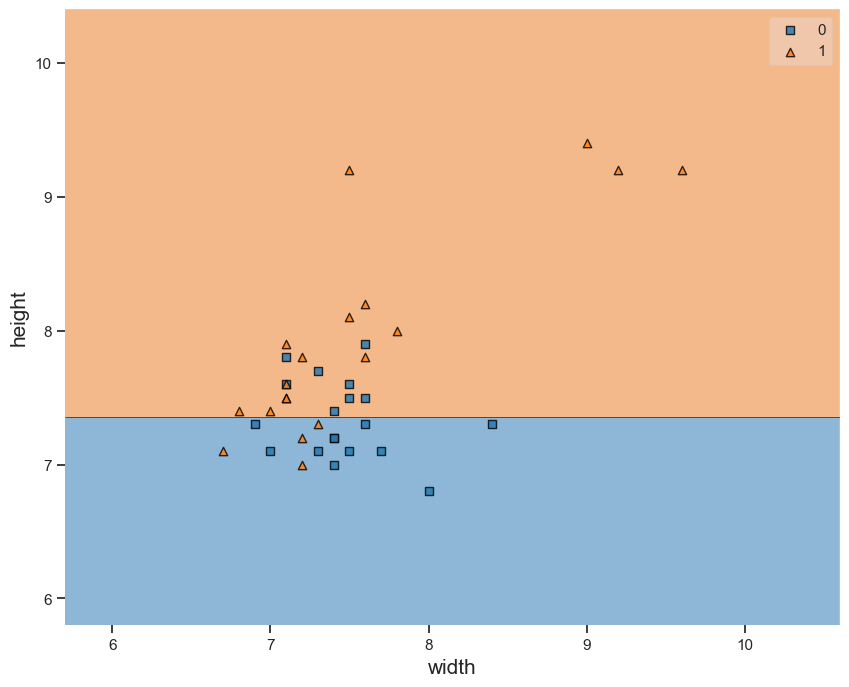

In [20]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("width", fontsize = 15)
plt.ylabel("height", fontsize = 15)
plt.grid()
plt.show()


### **Part 2. RandomForestClassifier**


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)


tree_clf = DecisionTreeClassifier(max_depth=15, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         9
           1       0.57      0.57      0.57         7

    accuracy                           0.62        16
   macro avg       0.62      0.62      0.62        16
weighted avg       0.62      0.62      0.62        16
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.55      0.86      0.67         7

    accuracy                           0.62        16
   macro avg       0.67      0.65      0.62        16
weighted avg       0.69      0.62      0.61        16
 

Forest Classification Report
              precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.55      0.86      0.67         7

    accuracy                           0.62        16
   macro avg       0.67      0.65     

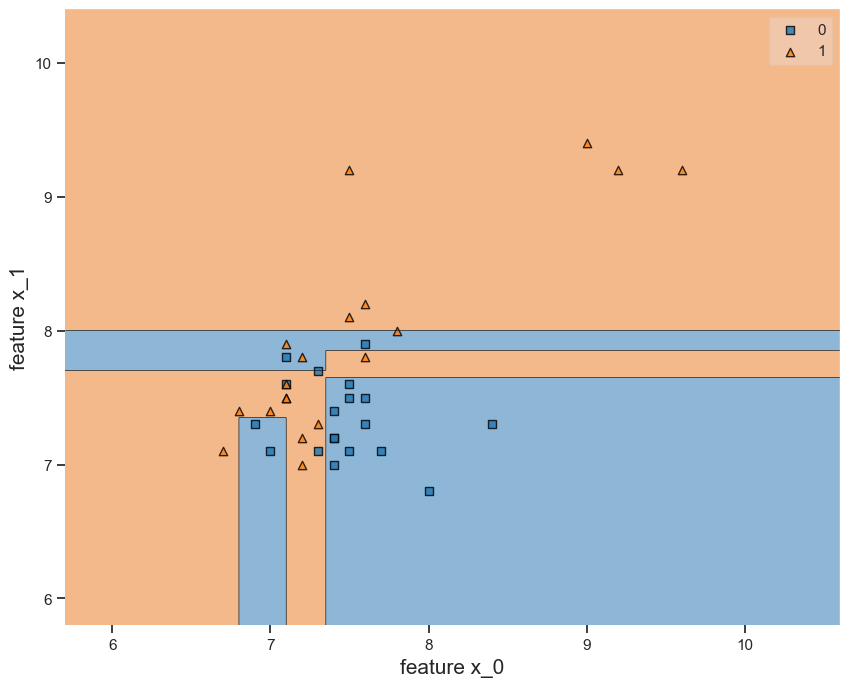

In [22]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

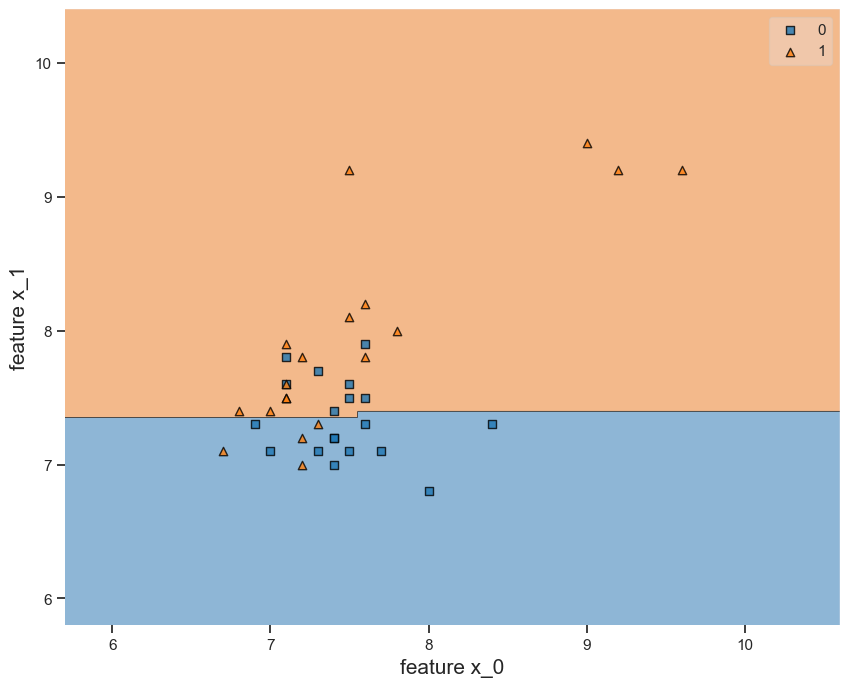

In [23]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

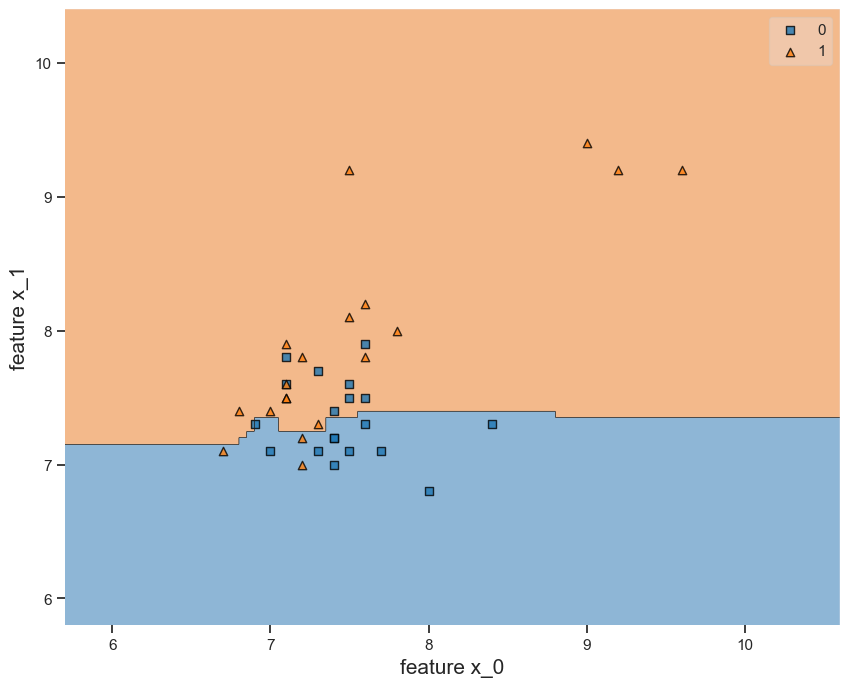

In [24]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = forest_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

### **Part 3. Features and feature importance**

In [25]:
from sklearn.ensemble import RandomForestClassifier

X = df[["width", "height", "mass", "color_score"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 2)



tree_clf = DecisionTreeClassifier(max_depth=15, random_state=2,)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=2),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1, random_state=2)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.75      1.00      0.86         9

    accuracy                           0.81        16
   macro avg       0.88      0.79      0.79        16
weighted avg       0.86      0.81      0.80        16
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       1.00      0.14      0.25         7
           1       0.60      1.00      0.75         9

    accuracy                           0.62        16
   macro avg       0.80      0.57      0.50        16
weighted avg       0.77      0.62      0.53        16
 

Forest Classification Report
              precision    recall  f1-score   support

           0       1.00      0.14      0.25         7
           1       0.60      1.00      0.75         9

    accuracy                           0.62        16
   macro avg       0.80      0.57     

In [26]:
names = ["width", "height", "mass", "color_score"]
for name, score in zip(names, forest_clf.feature_importances_):
    print(name, score)

width 0.058
height 0.3
mass 0.222
color_score 0.42
